In [1]:
%matplotlib inline
from config_calc import *
import grid_tools

from collections import OrderedDict

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [72]:
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['Z3','Q','PS','PBLH','T','U','V','U10','PSL','OMEGA']+tracer_3d

diri = os.path.join(dataroot,'orcas','cesm_flight_data')
model_files = [os.path.join(diri,'.'.join([case,os.path.basename(f)])) 
              for f in gv.flight_file]

obs = xr.open_mfdataset(gv.flight_file)
mdl = xr.open_mfdataset(model_files)

obs['GGALT'] = obs.GGALT * 1e-3
obs.GGALT.attrs['units'] = 'km'

mdl['GGALT'] = obs.GGALT
mdl

<xarray.Dataset>
Dimensions:   (time: 34205)
Coordinates:
  * time      (time) datetime64[ns] 2016-01-15T12:57:26.000000043 ...
Data variables:
    O2_OCN    (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09k  (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    aO2_GKA   (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_C15O  (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_LND   (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    U10       (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09   (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    PS        (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09b  (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09c  (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09d  (time) float64 dask.array<shape=(34205,), chunksize=(2723,)>
    CO2_T09e  (time) float64 da

In [84]:
%%time
zero_bin = [1,99]
alt_bins = np.concatenate((np.arange(0.,1.,0.25),np.arange(1.,14.5,0.5)))
alt_bin_c = np.vstack((alt_bins[0:-1],alt_bins[1:])).mean(axis=0)

groups = mdl.drop(['DOY','UTC']).groupby_bins('GGALT',alt_bins,labels=alt_bin_c)
mdl_avg = groups.mean()
mdl_std = groups.std()

groups = obs.drop(['DOY','UTC']).groupby_bins('GGALT',alt_bins,labels=alt_bin_c)
obs_avg = groups.mean()
obs_std = groups.std()
  
mdl_avg.info()

xarray.Dataset {
dimensions:
	GGALT_bins = 30 ;

variables:
	float64 GGALT_bins(GGALT_bins) ;
	float64 O2_OCN(GGALT_bins) ;
	float64 CO2_T09k(GGALT_bins) ;
	float64 aO2_GKA(GGALT_bins) ;
	float64 CO2_C15O(GGALT_bins) ;
	float64 CO2_LND(GGALT_bins) ;
	float64 U10(GGALT_bins) ;
	float64 CO2_T09(GGALT_bins) ;
	float64 PS(GGALT_bins) ;
	float64 CO2_T09b(GGALT_bins) ;
	float64 CO2_T09c(GGALT_bins) ;
	float64 CO2_T09d(GGALT_bins) ;
	float64 CO2_T09e(GGALT_bins) ;
	float64 CO2_T09f(GGALT_bins) ;
	float64 CO2_T09g(GGALT_bins) ;
	float64 CO2_T09h(GGALT_bins) ;
	float64 CO2_T09i(GGALT_bins) ;
	float64 CO2_T09j(GGALT_bins) ;
	float64 CO2_CROF(GGALT_bins) ;
	float64 CO2_T09l(GGALT_bins) ;
	float64 CO2_OCN(GGALT_bins) ;
	float64 CO2_CROT(GGALT_bins) ;
	float64 Pm(GGALT_bins) ;
	float64 OMEGA(GGALT_bins) ;
	float64 CO2_L14C(GGALT_bins) ;
	float64 Z3(GGALT_bins) ;
	float64 PBLH(GGALT_bins) ;
	float64 CO2_T09a(GGALT_bins) ;
	float64 CO2_CROO(GGALT_bins) ;
	float64 Q(GGALT_bins) ;
	float64 U(GGALT_bins

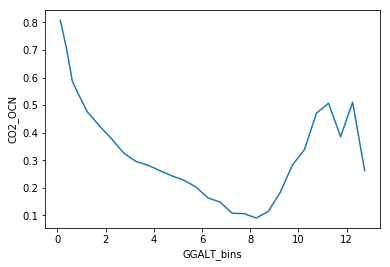

In [86]:
mdl_std.CO2_OCN.plot()

array([  0.125,   0.375,   0.625,   0.875,   1.25 ,   1.75 ,   2.25 ,
         2.75 ,   3.25 ,   3.75 ,   4.25 ,   4.75 ,   5.25 ,   5.75 ,
         6.25 ,   6.75 ,   7.25 ,   7.75 ,   8.25 ,   8.75 ,   9.25 ,
         9.75 ,  10.25 ,  10.75 ,  11.25 ,  11.75 ,  12.25 ,  12.75 ,
        13.25 ,  13.75 ])